
# <center><h2>Pima Diabetes - Case Study</h2></center>

## Introduction
>The [Pima](https://en.wikipedia.org/wiki/Pima_people) are a group of **Native Americans** living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop **the highest prevalence of type 2 diabetes** and for this reason they have been subject of many studies.

## Dataset
The dataset includes data from **768** women with **8** characteristics, in particular:

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function
* Age (years)

The last column (Outcome) of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

Let's do Exploratory Data Analysis(EDA) by performing initial investigations on data so as to discover any hidden patterns, or to spot anomalies.

## Imports and configuration

In [1]:
# Import all the libraries needed to load the dataset and visualize it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure for any default setting of any library
%matplotlib inline
sns.set(style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True)

**Comments**
>- **``%matplotlib inline``** sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline without needing to call plt.show() every time a data is plotted.
>- Set few of the Seaborn's asthetic parameters

## Load the Dataset

In [3]:
# Load the dataset into a Pandas dataframe called pima
pima = pd.read_csv('diabetes.csv')

In [4]:
# Check the head of the dataset
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Check the tail of the dataset
pima.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Comments**
>To take a closer look at the data, pandas library provides **“.head()”** function which returns first five observations and **“.tail()”** function which returns last five observations of the data set.

## Inspect the Dataset

In [6]:
# Get the shape and size of the dataset
pima.shape

(768, 9)

**Observations**
>- This dataset contains **768** observations with **8** independant attribues and **1** dependant attribute

In [7]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Observations**
>- The dataset comprises of **768 rows** and **9 columns**
>- Name of the Columns are **Pregnancies**, **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, **BMI**, **DiabetesPedigreeFunction**, **Age** and **Outcome**
>- All columns are of type integer where as only BMI and DiabetesPedigreeFunction are of type float
>- There are **No null/missing values** present in the dataset

In [8]:
# Describe the dataset with various summary and statistics
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Comments**
>- This **".describe()"** function generates descriptive statistics that summarizes the central tendency, dispersion and shape of a dataset's distribution, excluding ``NaN`` values
>- **``Central Tendency``** is represented by indices *min, 25%, 50%, 75% and max*.
>- 25% is also known as **``First Quartile (Q1)``**, 50% as Second Quartile or **``Median (Q2)``** and 75% as **``Third Quartile (Q3)``**

**Observations**
>- First 6 predictors have a minimum value of 0 present in the Central Tendency chart, hence the distributions contains one or more zero values.
>- In reality, unlike *Pregnencies*, it is impossible to have zero values for all other attributes i.e. *Glucose*, *BloodPressure*, *SkinThickness*, *Insulin* and *BMI* from biological standpoint. Hence assuming these constitues **encoded missing data**.

In [9]:
# Find out encoded missing data
print("The count of 0's in various distributions:")
for col in pima.columns[1:-3]:
    print("{}: {}".format(col, len(pima[pima[col]==0])))

The count of 0's in various distributions:
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


### Data Cleaning
We can't draw proper conclusion and derive relationships with Exploratory Data Analysis (EDA) when the data is missing/encoded. So we have to find a solution to clean it up before taking it into consideration.

The easiest option could be to eliminate all those patients' record with zero values present in any of the attributes where it is biologically impossible, but in this way we would end up eliminating a lot of other important data.

Hence we impute **``Median``** in place of all the zero values from the respective distribution.

In [10]:
# Impute 0's with Median of the distribution
for col in pima.columns[1:-3]:
    pima[col] = pima[col].replace(0, pima[col].median())

# Head of the dataset
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


**Observation**
>- The zero values in Glucose, BloodPressure, SkinThickness, Insulin and BMI are replaced by 117, 72, 23, 30.5 and 32 respectively which are the medians of the respective columns.

In [21]:
pima.quantile()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      31.2500
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
Name: 0.5, dtype: float64

In [11]:
# Describe again the dataset now
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Observations**
>It is an Univariate Analysis of each of the attributes in the dataset
>#### Pregnancies
>>- Mean is slightly greater than median, hence the distribution is slightly right skewed
>>- There is a large difference between 75 %tile and max. Also the max is greater than 1.5 times the IQR(5) hence it contains positive outlier
>#### Glucose
>>- Glucose almost appears to be an uniform distribution
>>- The min and the max values lie within the range of 1.5*IQR, hence the predictor doesn't contain any outliers
>#### BloodPressure
>>- BloodPressure is almost an uniform distribution as the mean and the meadian are very close to each other.
>>- However, the min amd max values are outside the range of 1.5*IQR(16) in both the ends. Hence these represents outliers
>#### SkinThickness
>>- The distribution is pretty much positively(right) skewed
>>- Max value is greater than 3*IQR(9), hence the max value is called as ``Extreme Outlier``
>#### Insulin
>>- It is fairly right skewed as there is a noteble difference bewteen mean and median
>>- The max value of the distribution is a way outside the 3*IQR hence it contains extreme positive outliers
>#### BMI
>>- The mean and median are almost eqaul, hence it is an uniform distribution
>>- The difference of 75 %tie and max is notably large and is outside of the 3*IQR(9) which suggests the distribution contains extreme positive outlier
>#### DiabetesPedigreeFunction
>>- It seems to be right skewed distribution
>>- Contains many positive outliers as there is a huge difference between median and max
>#### Age
>>- It seems to be right skewed distribution
>>- Contains many positive outliers as there is a huge difference between median and max

### Data Correlation Matrix
The correlation matrix is an important tool for Bivariate Analysis which helps to understand the correlation between different attrinutes. The values range from -1 to 1 and the closer a value to 1 the better is the correlation among them.

In [12]:
# Find the correlation matrix
pima.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


**Observation**
>- Obviously Glucose has a strong correlation with being diabetic. However it also indicates that Greater the value of BMI and Age of a patient, higher is the probability of developing type 2 diabetes
>- Obviously Age is directly propertional to Pregnency. Greater the Age, higher the no of Pregnencies reported by the patient.
>- Insulin secretion increses slightly with the higher level of Glucose content in the body.
>- Increase in SkinThickness cnstitutes increase in Body Mass Index (BMI)

## Understanding the target variable

In [13]:
# Find count of unique target variable
len(pima['Outcome'].unique())
# OR
pima['Outcome'].nunique()

2

In [14]:
# What are the different values for the dependant variable
pima['Outcome'].unique()

array([1, 0], dtype=int64)

In [15]:
# Find out the value counts in each outcome
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Observation**
>- Target variable/Dependent variable is discrete and categorical in nature
>- There are two unique outcomes of the dataset which indicates if the person has been diagnosed with diabetes (1) or not (0)
>- The ratio of diabetic to non-diabetic women in the dataset is close to 1:2
>- The data is a balanced data, not unbiased one to deal with

In [136]:
# Map the outcomes to categorical values Diabetic(1) or Non-Diabetic(0)
pima['Outcome'] = pima['Outcome'].map({1:'Diabetic', 0:'Non-Diabetic'})
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,Diabetic
1,1,85,66,29,30.5,26.6,0.351,31,Non-Diabetic
2,8,183,64,23,30.5,23.3,0.672,32,Diabetic
3,1,89,66,23,94.0,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168.0,43.1,2.288,33,Diabetic


## Data Visualization
Exploratory Data Analysis(EDA) is incomplete without Data Visualization. It's a pictorial representation of data using beautiful graphs. It enables us to see analytics presented visually which helps in grasping unnoticed information or identify new patterns.

### Univariate Analysis - To check individual distribution- Skewness

D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axe

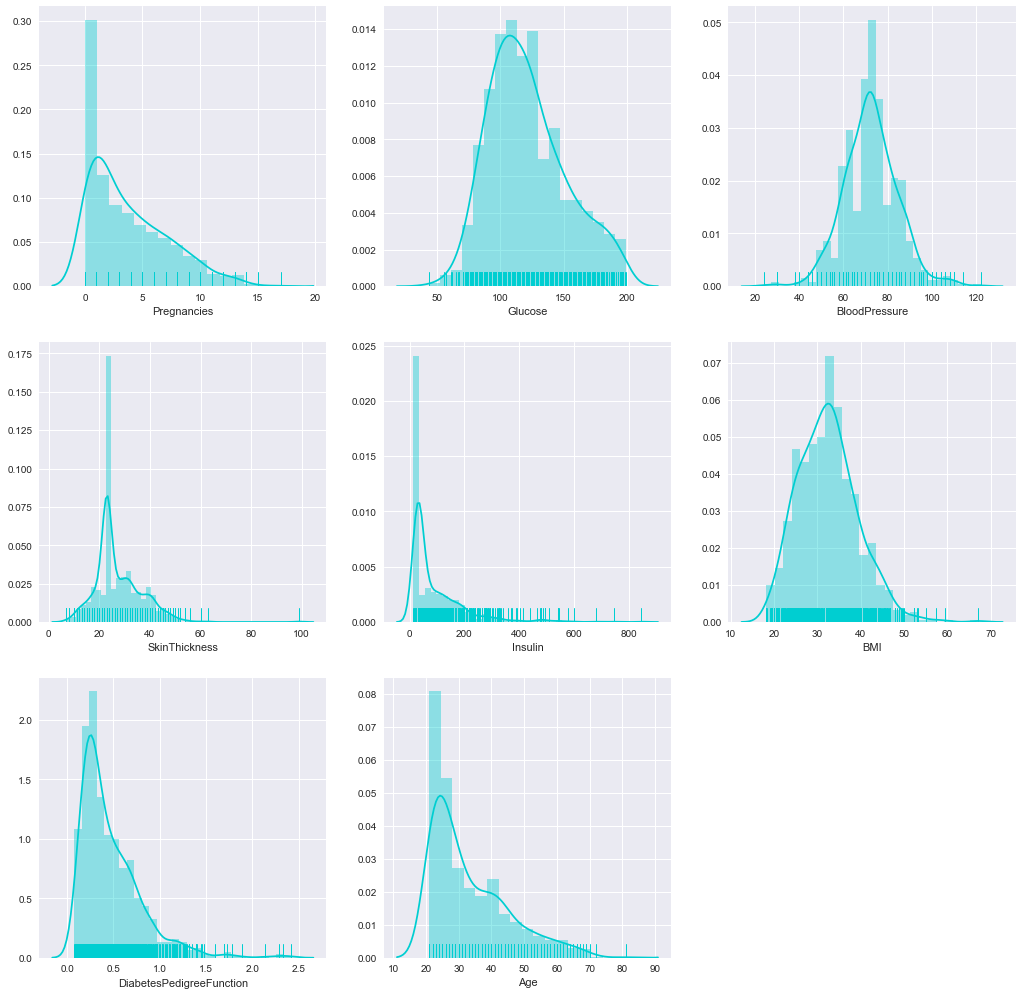

In [87]:
# Check for distribution orientation
plt.figure(figsize=(17.5,17.5))
index = 1
for col in pima.columns[:-1]:
    plt.subplot(3,3,index)
    sns.distplot(pima[col], rug=True, kde=True, color='darkturquoise')
    index += 1

**Observations**
>- Histograms are a good graphical visualisation of the data by which we have a better understanding of the various features values distribution: for example we can understand what's the average age of the people or the average BMI etc.
>- *Glucose* and *BloodPressure* appears to be uniform distribution, where as all other are right/positively skewed

### Univariate Analysis - To check central tendency and outliers

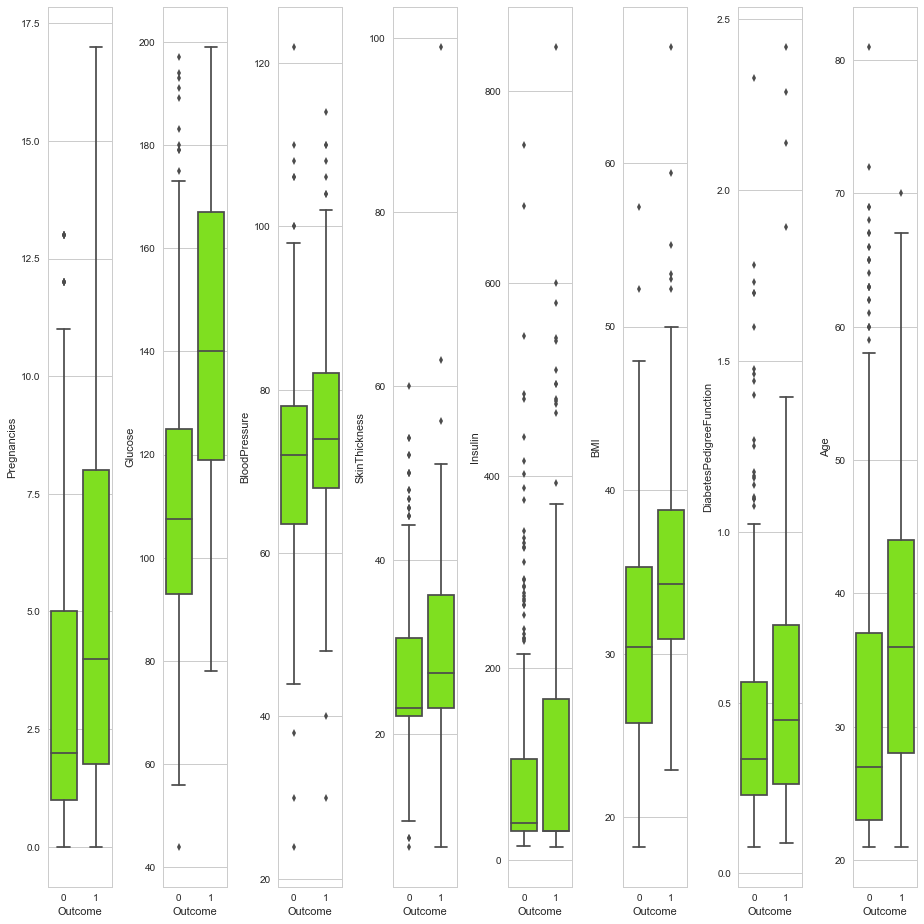

In [20]:
# Check for distribution Central Tendency
plt.figure(figsize=(13,13))
index = 1
for col in pima.columns[:-1]:
    sns.set_style('whitegrid')
    plt.subplot(1,8,index)
    sns.boxplot(x='Outcome', y=col, data=pima, orient='v', color='chartreuse')
    index += 1
    plt.tight_layout()

**Comments**
>- **Median**: The median is represented by the line in the box. The median is a common measure of the center of your data. Half the observations are less than or equal to it, and half are greater than or equal to it.
>- **Interquartile range box**: The interquartile range box represents the middle 50% of the data. It shows the distance between the first and third quartiles (Q3-Q1).
>- **Whiskers**: The whiskers extend from either side of the box. The whiskers represent the ranges for the bottom 25% and the top 25% of the data values, excluding outliers.

**Observations**
>- Except for *Pregnencies* all other attributes contain outliers
>- *Pregnencies*, *Glucose* and *Age* have relatively taller boxplots. This indicates that data is widely spread for these atributes
>- All other predictors have comparatively concentrated data spread although they contains outliers.

### Bivariate Analysis - To check relationship between two predictors

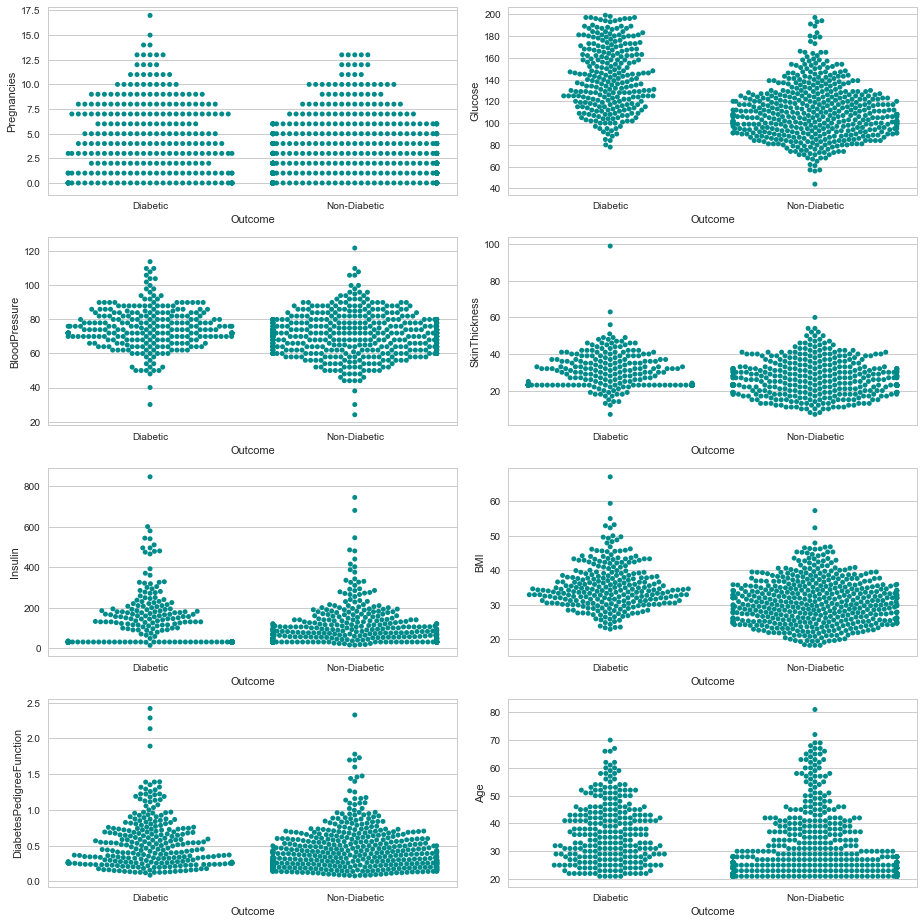

In [161]:
# Outcome vs. all other predictor
plt.figure(figsize=(13,13))
index = 1
for col in pima.columns[:-1]:
    plt.subplot(4,2,index)
    sns.swarmplot(pima['Outcome'], pima[col], color='darkcyan')
    index += 1
    plt.tight_layout()

**Observations**
>- The relationship of *Pregnancies* and *Outcome* shows that patients are more prone to being diabetic if the no of occasions of pregnancies increses.

D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


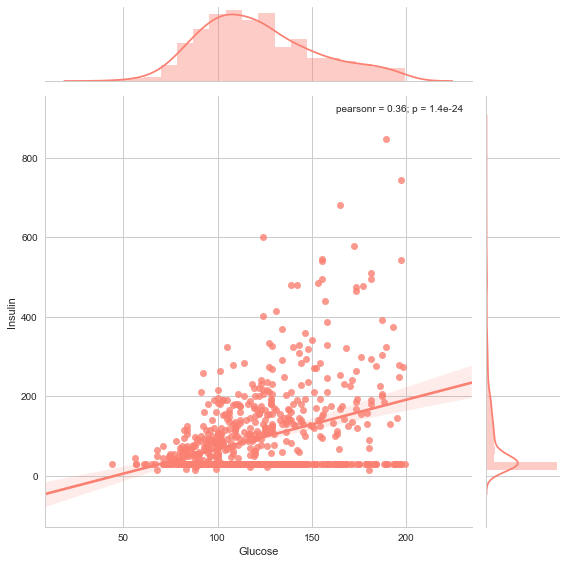

In [180]:
# Glucose vs. Insulin
sns.jointplot(pima['Glucose'], pima['Insulin'], kind='reg', size=8, color='salmon')

**Observations**
>- The relationship of *Pregnancies* and *Outcome* shows that patients are more prone to being diabetic if the no of occasions of pregnancies increses.

D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


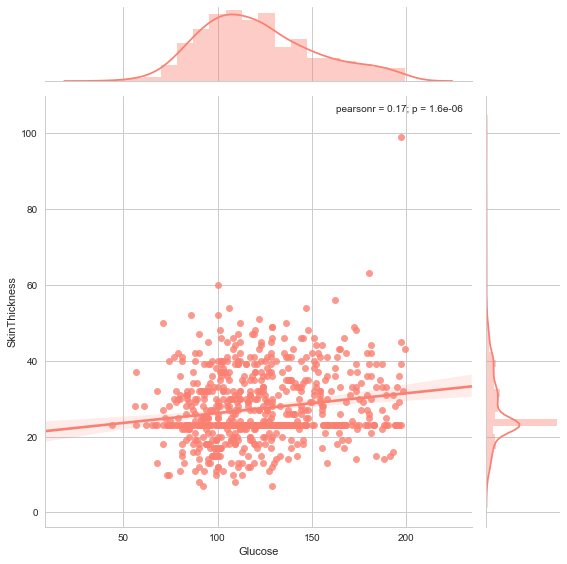

In [183]:
# Glucose vs. SkinThickness
sns.jointplot(pima['Glucose'], pima['SkinThickness'], kind='reg', size=8, color='salmon')

**Observations**
>- The relationship of *Pregnancies* and *Outcome* shows that patients are more prone to being diabetic if the no of occasions of pregnancies increses.

D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


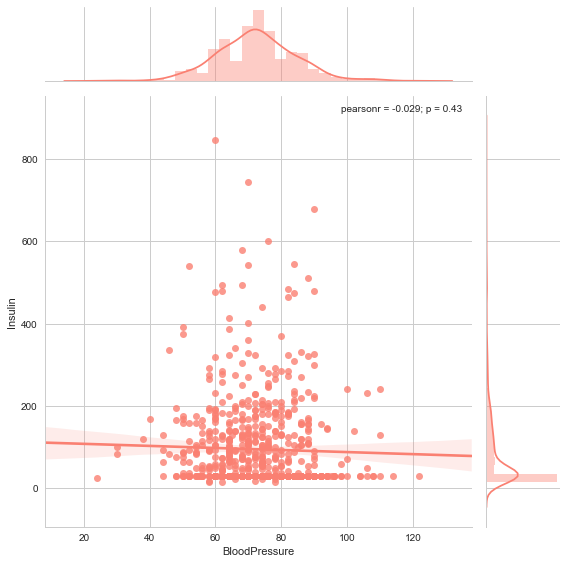

In [188]:
# Glucose vs. SkinThickness
sns.jointplot(pima['BloodPressure'], pima['Insulin'], kind='reg', size=8, color='salmon')

**Observations**
>- The relationship of *Pregnancies* and *Outcome* shows that patients are more prone to being diabetic if the no of occasions of pregnancies increses.

D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


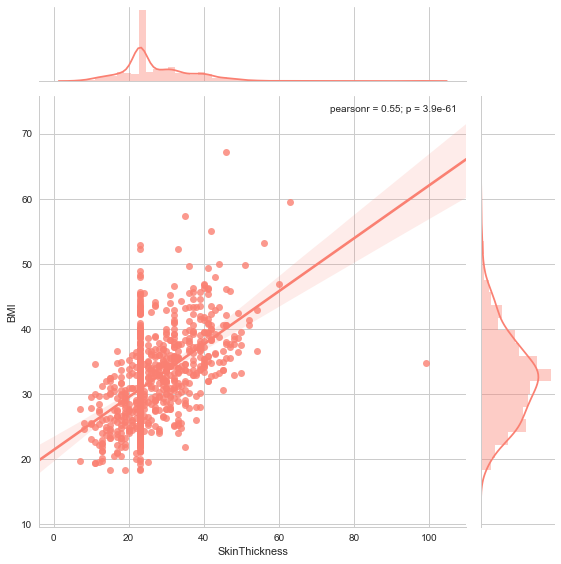

In [190]:
# Glucose vs. SkinThickness
sns.jointplot(pima['SkinThickness'], pima['BMI'], kind='reg', size=8, color='salmon')

**Observations**
>- The relationship of *Pregnancies* and *Outcome* shows that patients are more prone to being diabetic if the no of occasions of pregnancies increses.

D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


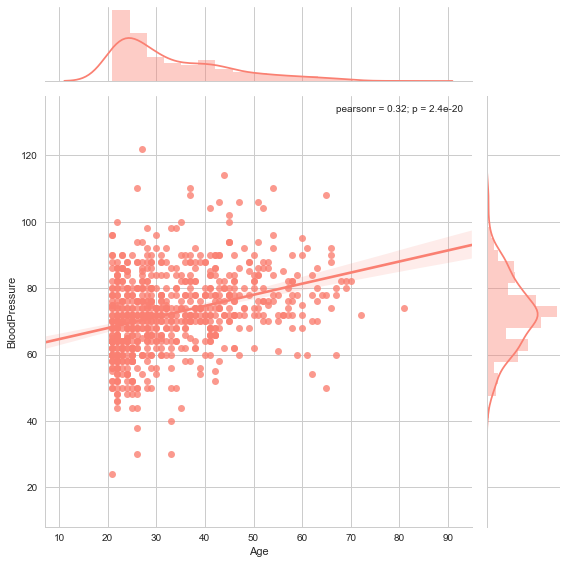

In [192]:
# Glucose vs. SkinThickness
sns.jointplot(pima['Age'], pima['BloodPressure'], kind='reg', size=8, color='salmon')

**Observations**
>- The relationship of *Pregnancies* and *Outcome* shows that patients are more prone to being diabetic if the no of occasions of pregnancies increses.

D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


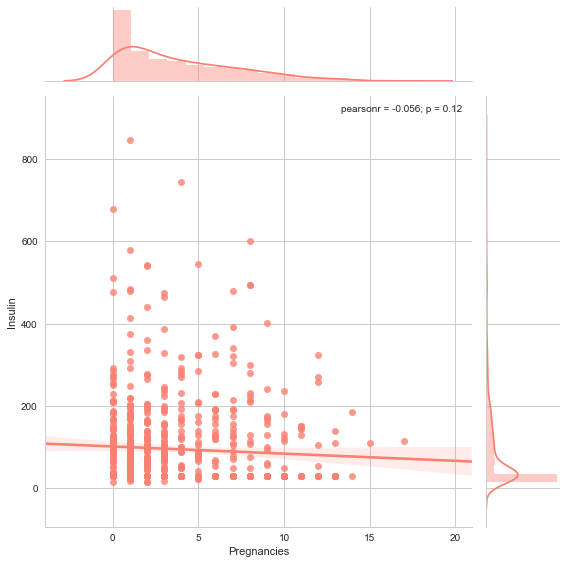

In [193]:
# Glucose vs. SkinThickness
sns.jointplot(pima['Pregnancies'], pima['Insulin'], kind='reg', size=8, color='salmon')

**Observations**
>- The relationship of *Pregnancies* and *Outcome* shows that patients are more prone to being diabetic if the no of occasions of pregnancies increses.

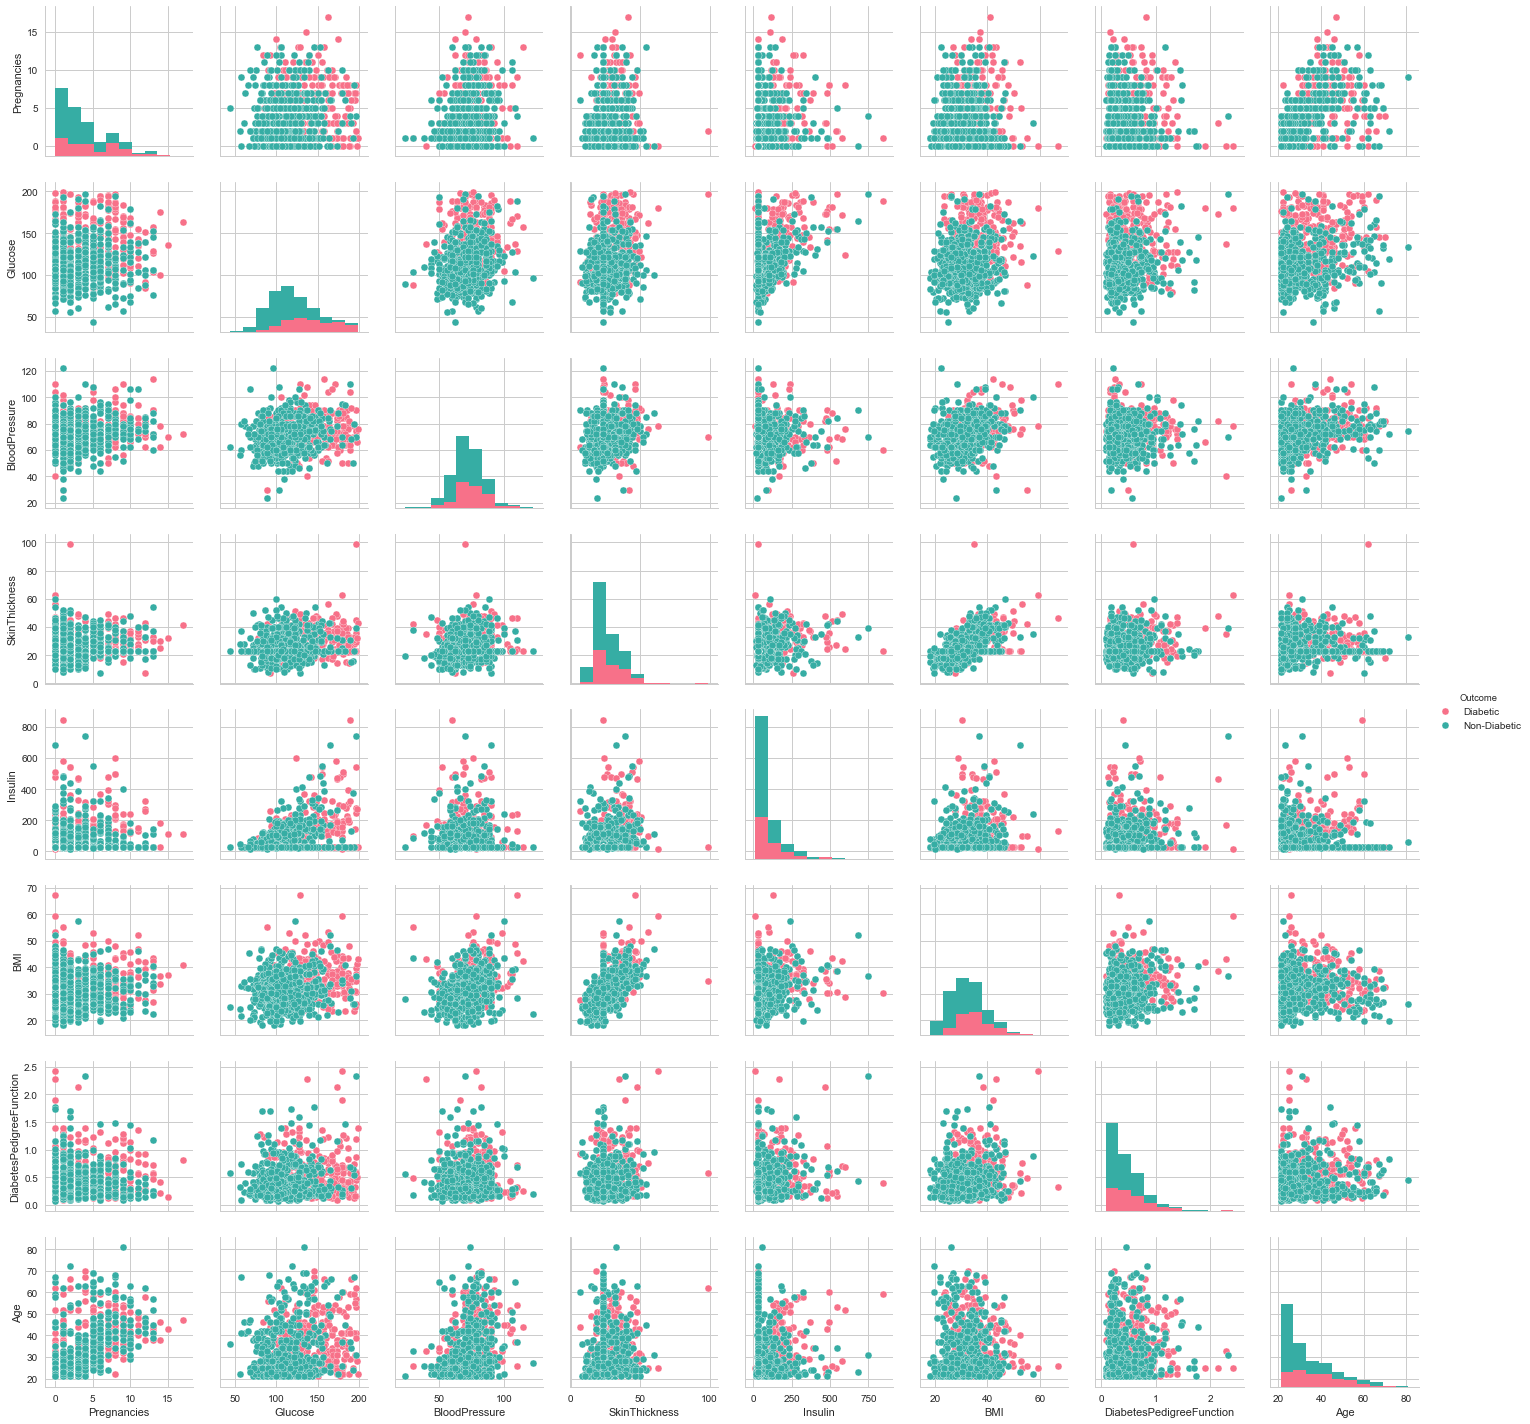

In [20]:
sns.pairplot(pima, hue='Outcome', palette='husl')

**Comments**
> Pair plot is built on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.

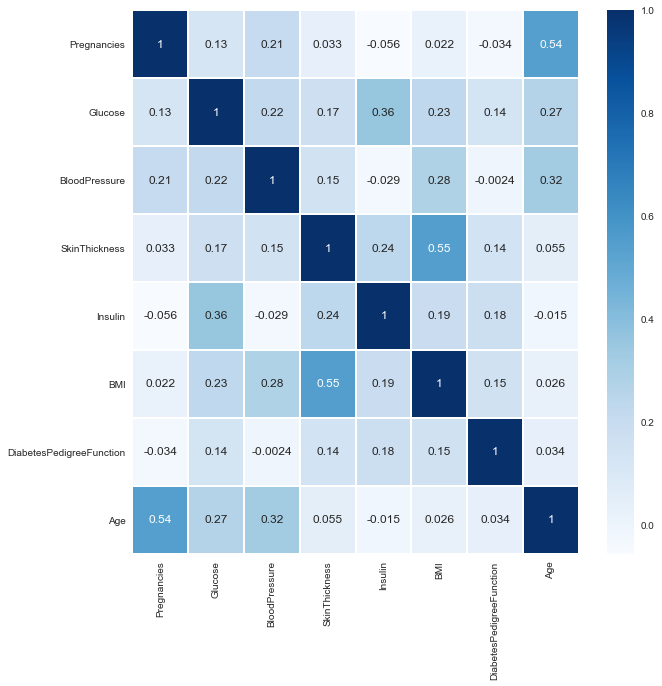

In [21]:
# Visualize the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(pima.corr(), annot=True, cmap='Blues', linewidths=1)

**Observation**
>- This indicates Glucose and Insulin are positively correlated with **Perarson's correlation coefficient of 0.33** which shows that patients with *higher Glucose level tend to have higher Insulin reading*
>- Glucose and BloodPressure tend to be correlated with Age. It indicates that **with increase in the Age of a patient, Glucose and BloodPressure level increses**.